In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator #导入此类，设置坐标轴间隔
%matplotlib inline
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

output max is  304.50993275129747


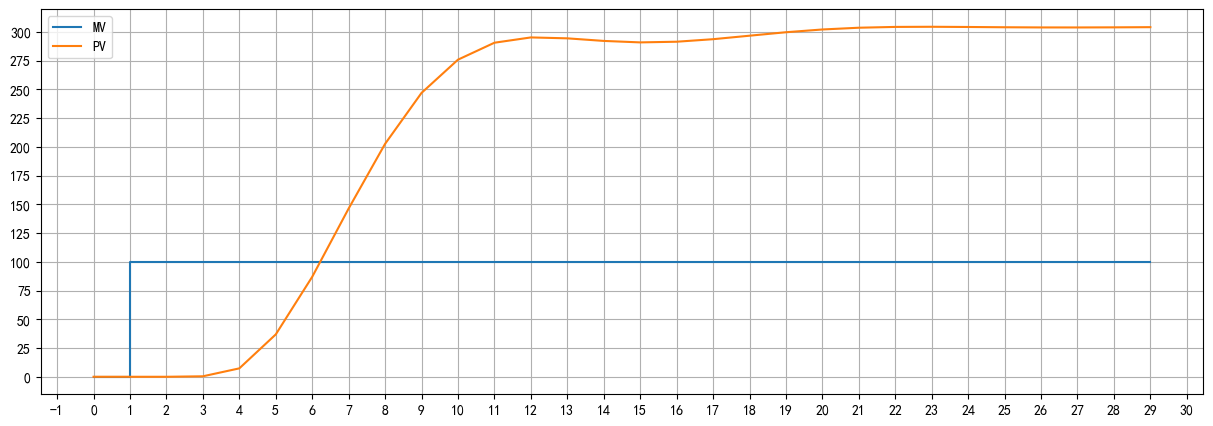

In [2]:
theta  = np.array([-2.06046,1.58896,-0.45479,0.00419273,0.0603696,0.159942])
time_len = 30
x = np.zeros((time_len))
x[2:]=100
y_step = np.zeros((time_len))
for k in range(len(theta)//2, time_len, 1): 
#     y_step[k] = np.array([-1*y_step[k-1], -1*y_step[k-2], -1*y_step[k-3] , x[k-1], x[k-2], x[k-3]]) @ theta
    y_step[k] = np.r_[-y_step[k-len(theta)//2 : k][::-1], x[k-len(theta)//2 : k][::-1]] @ theta
plt.figure(1,figsize=(15,5))
ax = plt.subplot(1,1,1)
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(25)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
ax.step(range(time_len), x,label='MV', )
ax.plot(range(time_len), y_step,label='PV', )
plt.grid()
plt.legend(loc='best')
print("output max is ",np.max(y_step))

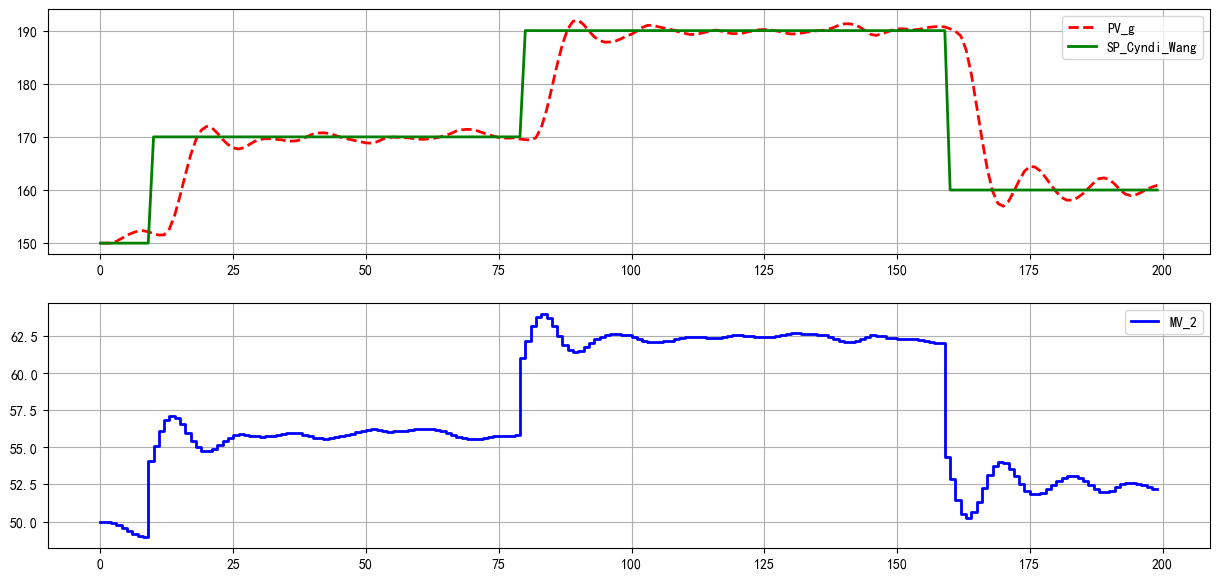

In [3]:
# 从上图可知
K = 3.05
T = 3.7
tau = 3

# ---λ整定---
lamda = tau
Ts = 1 # 采样周期
Kp = T/(K*(lamda + tau))
Ti = T
Td = 0
b = 1
#------------
sim_len = 200
u = np.ones((sim_len))*50
var = 0.1
noise = 1

pv = np.ones((sim_len))*150
sp = np.ones((sim_len))*150
sp[10:80] = 170
sp[80:160] = 190
sp[160:] = 160

delta_u = 0
err = np.zeros((sim_len))
err_1 = 0
err_2 = 0

for i in range(len(theta)//2, sim_len, 1): 
    np.random.seed(i)
    pv[i] = np.r_[-pv[i-len(theta)//2 : i][::-1], u[i-len(theta)//2 : i][::-1]] @ theta + noise*np.random.normal(loc=0.0, scale=var)
    err[i] = sp[i] - pv[i]
    delta_u = Kp*(b*(sp[i] - sp[i-1]) - (pv[i] - pv[i-1])) + Kp*Ts*err[i]/Ti + Kp*Td*(err[i] - 2*err_1 + err_2)/Ts
    u[i] = np.clip(u[i-1] + delta_u, 0.0, 100.0)
    err_2 = err_1
    err_1 = err[i]
    
plt.figure(2, figsize=(15,7))
plt.subplot(2,1,1)
plt.plot(pv,'r--',linewidth=2)
plt.plot(sp,'g-',linewidth=2)
plt.grid(True, which='both')
plt.legend(['PV_g','SP_Cyndi_Wang'])
plt.subplot(2,1,2)
plt.step(u,'b-',linewidth=2)
plt.grid()
plt.legend(['MV_2'])